In [35]:
###################################################
### This file is part of numsimqubits.          ###
###                                             ###    
### Copyright (c) 2020 and later, Andras Gyenis ###
### All rights reserved.                        ###
###################################################

# Importing packages, modules.

import sys
import numpy as np
sys.path.append('../')

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Image, Markdown

import numsimqubits.dynamics as dyn
from numsimqubits.dynamics.driven_systems import three_level_one_drive_A, three_level_one_drive_B, combine_pulses
from matplotlib.ticker import AutoMinorLocator
from qutip import Qobj
import qutip as qt
import copy

import numsimqubits.qubits.settings as sim_settings
sim_settings.update()

#### We consider an anharmonic three level system, where $\omega_{01}\approx \omega_{12}$.


In [54]:
# Define drive object.
pulse1 = dyn.Gaussian_pulse(
                           t_0      = 9e-9,                  # The center of the pulse [s].
                           sigma    = 3e-9,                  # The width of the pulse [s].
                           amp      = 68.5e-3,                    # The amplitude of the pulse [GHz].
                           freq     = 5,                       # The frequency of drive [GHz] 
                           phase    = 0,                       # The phase of the pulse.
                           t_ls     = np.linspace(0,1e-7,501),  # The time axis. 
                           t_cutoff = 6,
                            )

# Define the three level system object.
three_level_system = dyn.Atom(N_levels = 3,               # The number of energy levels.
                       energies      = [0, 5, 9.8],          # The energy of the atomic levels [GHz].
                       couplings     = [[0, 1, 0],                # The couplings between energy elevels.
                                        [1, 0, 1.41],
                                        [0, 1, 0]],  
                       depolar_rates = [[0, 0, 0],    # The decay between energy levels [1/s]. 
                                        [0, 0, 0], 
                                        [0, 0, 0]], 
                       dephase_rates = [[0, 0, 0],      # The dephasing between energy levels [1/s].
                                        [0, 0, 0], 
                                        [0, 0, 0]],
                       initial_state = qt.basis(3,0)
                      )


In [55]:
three_level_system.calculate_dynamics(three_level_one_drive_B, pulse1) 

In [56]:
wo_drag0 = three_level_system.population[0]
wo_drag1 = three_level_system.population[1]
wo_drag2 = three_level_system.population[2]

<IPython.core.display.Javascript object>


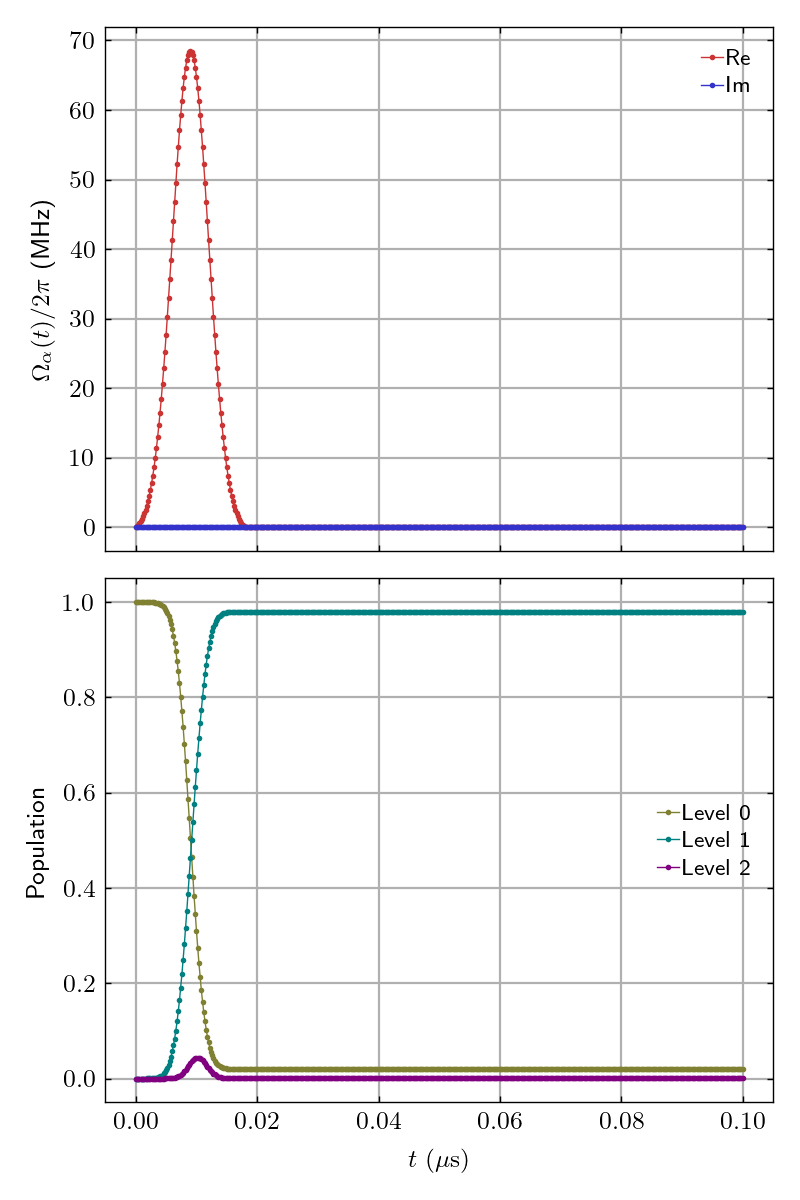

In [57]:
# Plot the pulses and the populations.

t_list = pulse1.t_ls

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, 
                        gridspec_kw={'height_ratios':[1,1]},
                       figsize=(4,6))

axs[0].plot(t_list * 1e6, pulse1.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[0].plot(t_list * 1e6, pulse1.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[0].set_ylabel(r"$\Omega_\alpha(t)/2\pi$ (MHz)", labelpad=5)
axs[0].legend(loc='best', fontsize = 8)
axs[0].grid()

axs[1].plot(t_list * 1e6, three_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[1].plot(t_list * 1e6, three_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[1].plot(t_list * 1e6, three_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[1].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[1].set_ylabel("Population", labelpad=5)
axs[1].legend(loc='best', fontsize = 8)
axs[1].grid()

plt.tight_layout()
plt.show()

In [137]:
pulse2 = copy.deepcopy(pulse1)
pulse3 = copy.deepcopy(pulse1)
pulse4 = copy.deepcopy(pulse1)
pulse5 = copy.deepcopy(pulse1)

pulse2.t_0 = pulse1.t_0 + pulse1.t_cutoff * pulse1.sigma
pulse3.t_0 = pulse2.t_0 + pulse1.t_cutoff * pulse1.sigma
pulse4.t_0 = pulse3.t_0 + pulse1.t_cutoff * pulse1.sigma
pulse5.t_0 = pulse4.t_0 + pulse1.t_cutoff * pulse1.sigma

pulse2.update_base()
pulse3.update_base()
pulse4.update_base()
pulse5.update_base()

calibration_pulses = combine_pulses(pulse1, pulse2, pulse3, pulse4, pulse5)

In [138]:
three_level_system.calculate_dynamics(three_level_one_drive_B, calibration_pulses) 

<IPython.core.display.Javascript object>


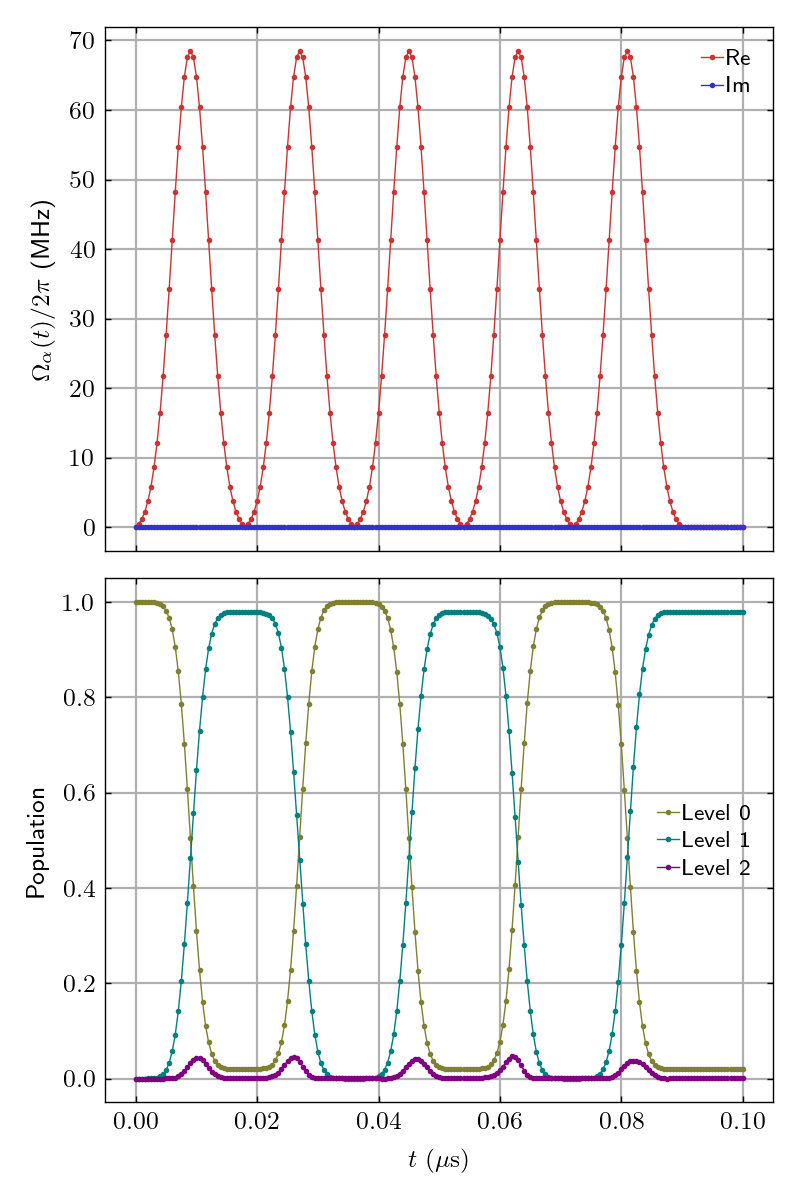

In [139]:
# Plot the pulses and the populations.

t_list = pulse1.t_ls

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, 
                        gridspec_kw={'height_ratios':[1,1]},
                       figsize=(4,6))

axs[0].plot(t_list * 1e6, calibration_pulses.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[0].plot(t_list * 1e6, calibration_pulses.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[0].set_ylabel(r"$\Omega_\alpha(t)/2\pi$ (MHz)", labelpad=5)
axs[0].legend(loc='best', fontsize = 8)
axs[0].grid()

axs[1].plot(t_list * 1e6, three_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[1].plot(t_list * 1e6, three_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[1].plot(t_list * 1e6, three_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[1].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[1].set_ylabel("Population", labelpad=5)
axs[1].legend(loc='best', fontsize = 8)
axs[1].grid()

plt.tight_layout()
plt.show()

In [140]:
three_level_system.population[1][-1]

0.9794670548542996

### With DRAG

Based on PHYSICAL REVIEW A 82, 040305(R) (2010), the drag coefficient is 
\begin{equation}
\beta = -\frac{\lambda^2}{4(\omega_{01}-\omega_{12})},
\end{equation}
where $\lambda=n_{12}/n_{01}$.


In [45]:
# Define drive object.
pulse1_drag = dyn.Gaussian_pulse_w_DRAG(
                           t_0      = 9e-9,                  # The center of the pulse [s].
                           sigma    = 3e-9,                  # The width of the pulse [s].
                           amp      = 68.2e-3,                   # The amplitude of the pulse [GHz].
                           freq     = 5,                       # The frequency of drive [GHz] 
                           phase    = 0,                       # The phase of the pulse.
                           drag_coeff = 2/0.2/4,               # The DRAG coefficient [GHz].
                           t_ls     = np.linspace(0,1e-7,501),  # The time axis. 
                           t_cutoff = 6
                            )


In [46]:
three_level_system.calculate_dynamics(three_level_one_drive_B, pulse1_drag) 

In [47]:

w_drag0 = three_level_system.population[0]
w_drag1 = three_level_system.population[1]
w_drag2 = three_level_system.population[2]

<IPython.core.display.Javascript object>


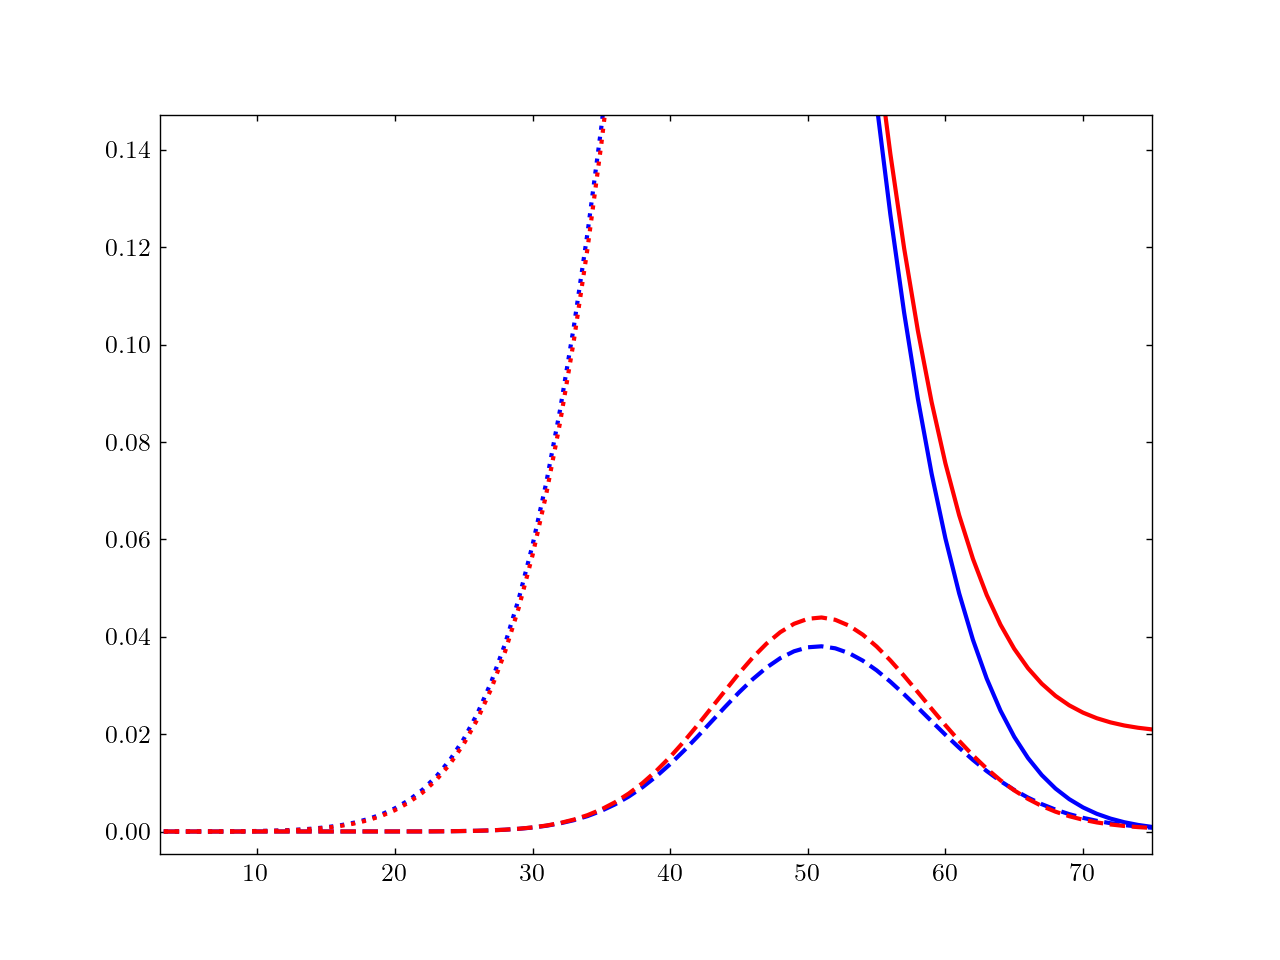

In [58]:
fig, axs = plt.subplots()

axs.plot(w_drag0, '-b')
axs.plot(w_drag1, ':b')
axs.plot(w_drag2, '--b')

axs.plot(wo_drag0, '-r')
axs.plot(wo_drag1, ':r')
axs.plot(wo_drag2, '--r')

<IPython.core.display.Javascript object>


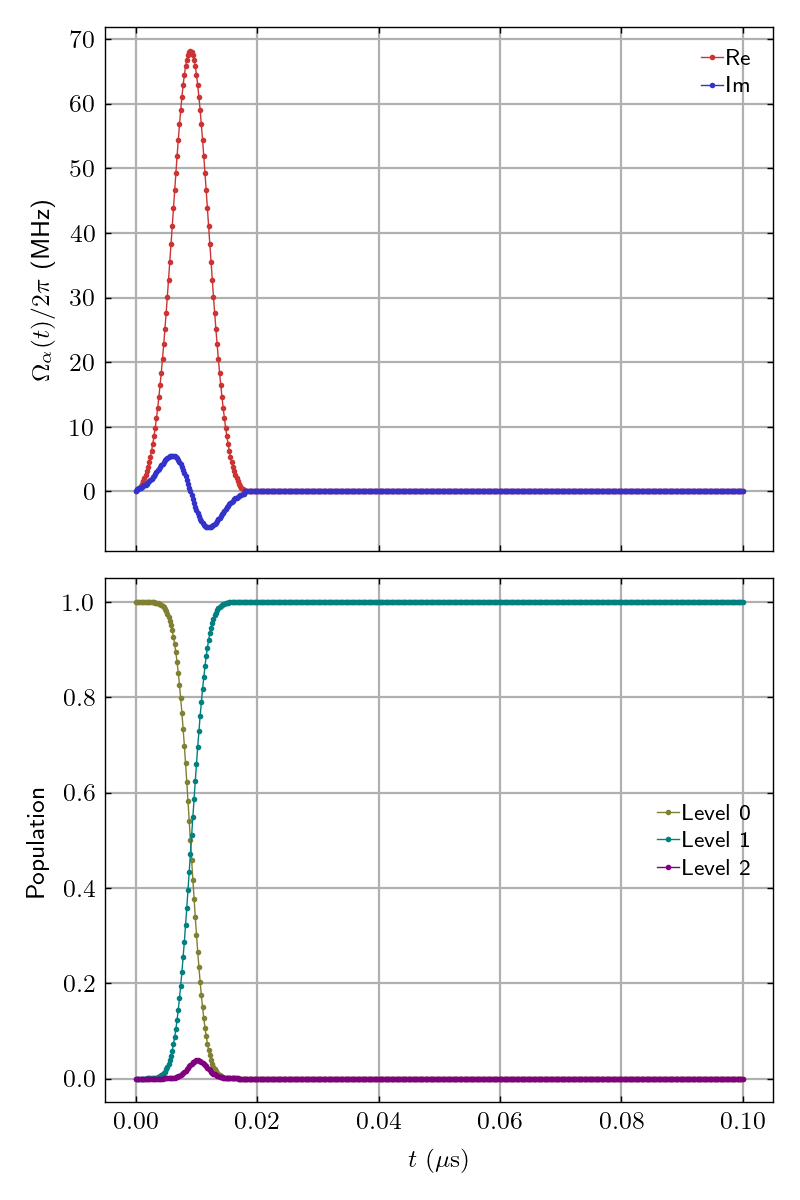

In [30]:
# Plot the pulses and the populations.

t_list = pulse1_drag.t_ls

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, 
                        gridspec_kw={'height_ratios':[1,1]},
                       figsize=(4,6))

axs[0].plot(t_list * 1e6, pulse1_drag.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[0].plot(t_list * 1e6, pulse1_drag.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[0].set_ylabel(r"$\Omega_\alpha(t)/2\pi$ (MHz)", labelpad=5)
axs[0].legend(loc='best', fontsize = 8)
axs[0].grid()

axs[1].plot(t_list * 1e6, three_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[1].plot(t_list * 1e6, three_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[1].plot(t_list * 1e6, three_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[1].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[1].set_ylabel("Population", labelpad=5)
axs[1].legend(loc='best', fontsize = 8)
axs[1].grid()

plt.tight_layout()
plt.show()

In [31]:
three_level_system.population[1][-1]

0.9999670604489064

In [32]:
pulse2_drag = copy.deepcopy(pulse1_drag)
pulse3_drag = copy.deepcopy(pulse1_drag)
pulse4_drag = copy.deepcopy(pulse1_drag)
pulse5_drag = copy.deepcopy(pulse1_drag)

pulse2_drag.t_0 = pulse1_drag.t_0 + pulse1_drag.t_cutoff * pulse1_drag.sigma
pulse3_drag.t_0 = pulse2_drag.t_0 + pulse1_drag.t_cutoff * pulse1_drag.sigma
pulse4_drag.t_0 = pulse3_drag.t_0 + pulse1_drag.t_cutoff * pulse1_drag.sigma
pulse5_drag.t_0 = pulse4_drag.t_0 + pulse1_drag.t_cutoff * pulse1_drag.sigma

pulse2_drag.update_base()
pulse3_drag.update_base()
pulse4_drag.update_base()
pulse5_drag.update_base()

calibration_pulses_drag = combine_pulses(pulse1_drag, pulse2_drag, pulse3_drag, pulse4_drag, pulse5_drag)

In [33]:
three_level_system.calculate_dynamics(three_level_one_drive_B, calibration_pulses_drag) 

<IPython.core.display.Javascript object>


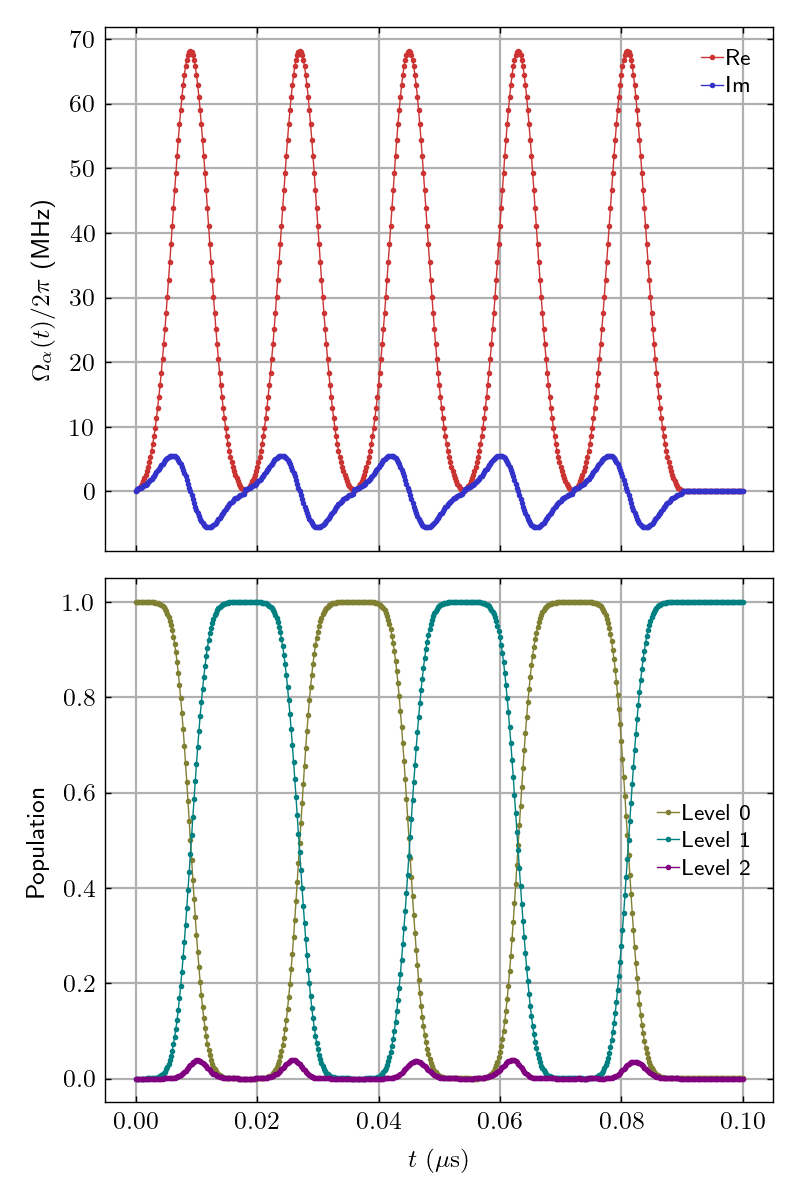

In [34]:
# Plot the pulses and the populations.

t_list = pulse1_drag.t_ls

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, 
                        gridspec_kw={'height_ratios':[1,1]},
                       figsize=(4,6))

axs[0].plot(t_list * 1e6, calibration_pulses_drag.I(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.8,0.2,0.2], label = r'Re')
axs[0].plot(t_list * 1e6, calibration_pulses_drag.Q(t_list) / 1e6 / 2 / np.pi, 
            '-o', markersize= 1, linewidth=0.5,
            color=[0.2,0.2,0.8], label = r'Im')
axs[0].set_ylabel(r"$\Omega_\alpha(t)/2\pi$ (MHz)", labelpad=5)
axs[0].legend(loc='best', fontsize = 8)
axs[0].grid()

axs[1].plot(t_list * 1e6, three_level_system.population[0], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'Level 0')

axs[1].plot(t_list * 1e6, three_level_system.population[1], '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'Level 1')

axs[1].plot(t_list * 1e6, three_level_system.population[2], '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.0,0.5], label = r'Level 2')

axs[1].set_xlabel(r"$t\ \mathrm{(}\mu \mathrm{s)}$", labelpad=5)
axs[1].set_ylabel("Population", labelpad=5)
axs[1].legend(loc='best', fontsize = 8)
axs[1].grid()

plt.tight_layout()
plt.show()

In [16]:
three_level_system.population[1][-1]

0.9997871482186593